<a href="https://colab.research.google.com/github/MarkWilcock/R-Course/blob/main/visualising_data_with_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
seq(1:5)

[1] 1 2 3 4 5

In [51]:
#install.packages("datasauRus")
#install.packages("ggthemes")
#install.packages("gganimate")
#install.packages("ggrepel")
#install.packages("patchwork")
install.packages("ggalt")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’, ‘data.table’, ‘proj4’, ‘ash’, ‘maps’, ‘extrafont’, ‘plotly’




In [24]:
library(tidyverse)
library(scales)

# These packages contains datasets that we will visuals
library(datasauRus)
#install.packages("nycflights13")
library(nycflights13)
#flights


In [ ]:
datasaurus_dozen

In [ ]:
iris

In [ ]:
covid_url <-
  "https://raw.githubusercontent.com/MarkWilcock/R-Course/main/Datasets/covid_cases_data.csv"
covid <- read_csv(covid_url)
head(covid)

In [ ]:
ggplot(data = covid,
       mapping = aes(x = Date, y = DailyCases, col = Country)) +
  geom_line()

In [9]:
covid_by_country <-
covid %>% 
  group_by(Country) %>% 
  summarise(Cases = sum(DailyCases))

covid_by_country


Country,Cases
<chr>,<dbl>
England,3588267
Northern Ireland,111746
Scotland,200767
Wales,203167


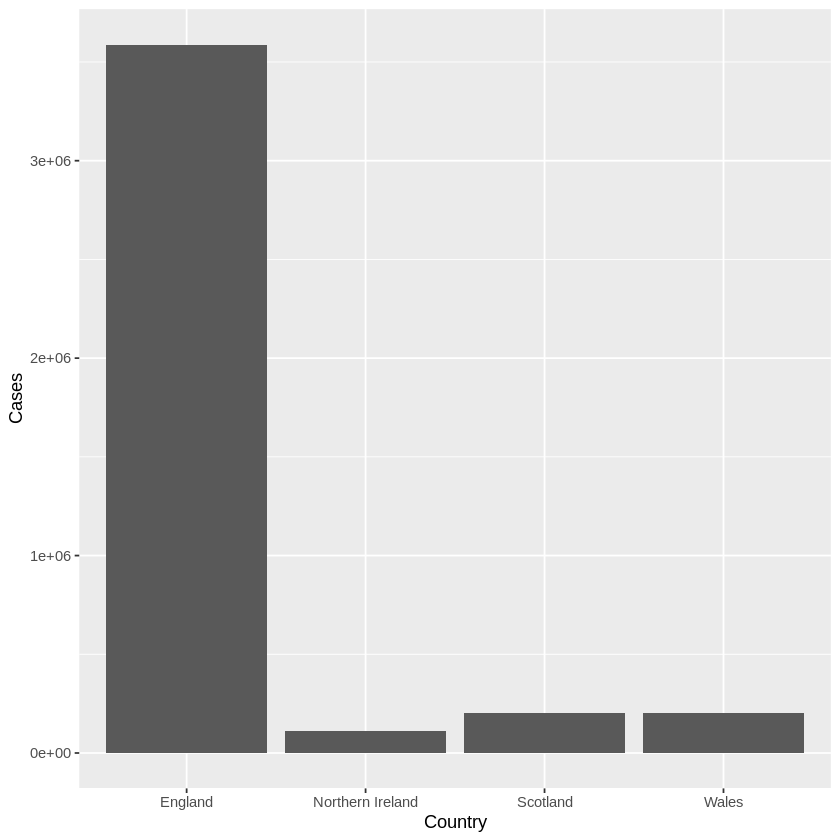

In [10]:
ggplot(data = covid_by_country,
       mapping = aes(x = Country, y = Cases)) +
  geom_col()

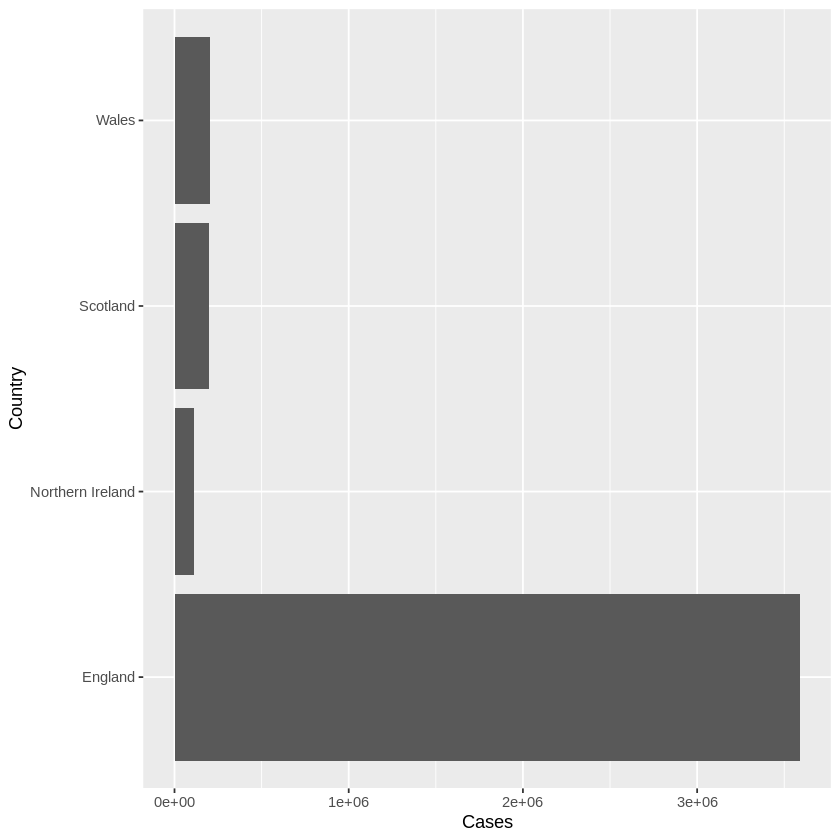

In [11]:
ggplot(data = covid_by_country,
       mapping = aes(x = Country, y = Cases)) +
  geom_col() +
  coord_flip()

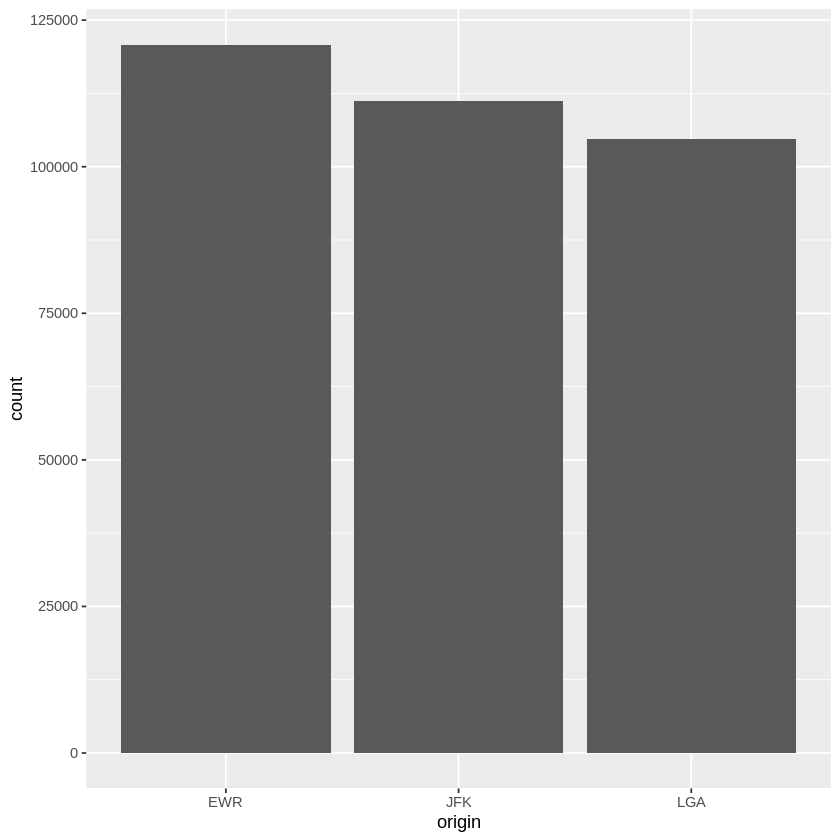

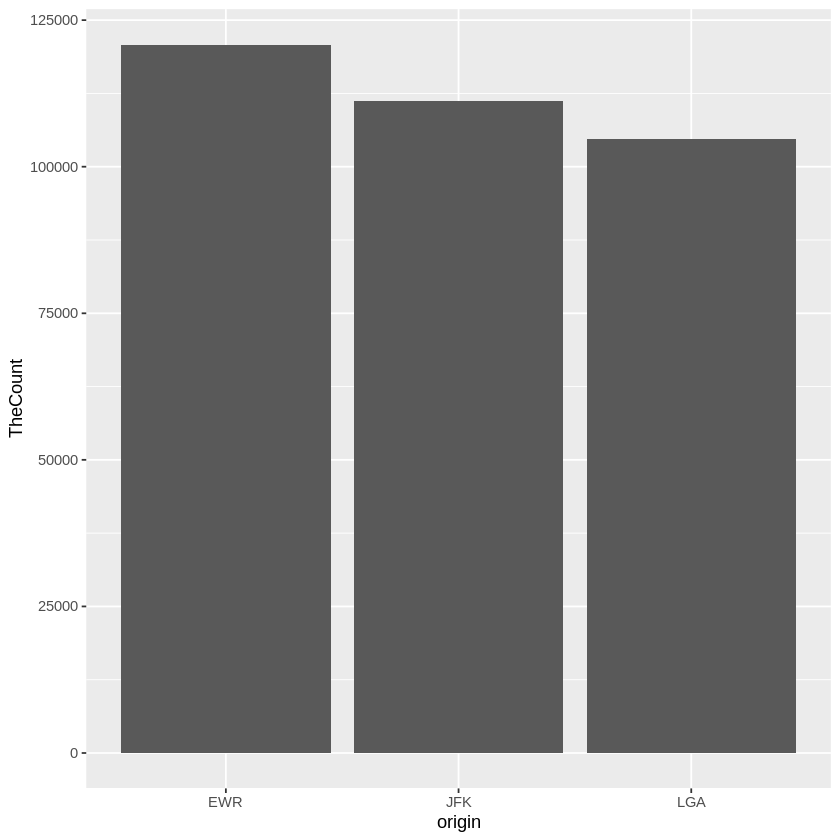

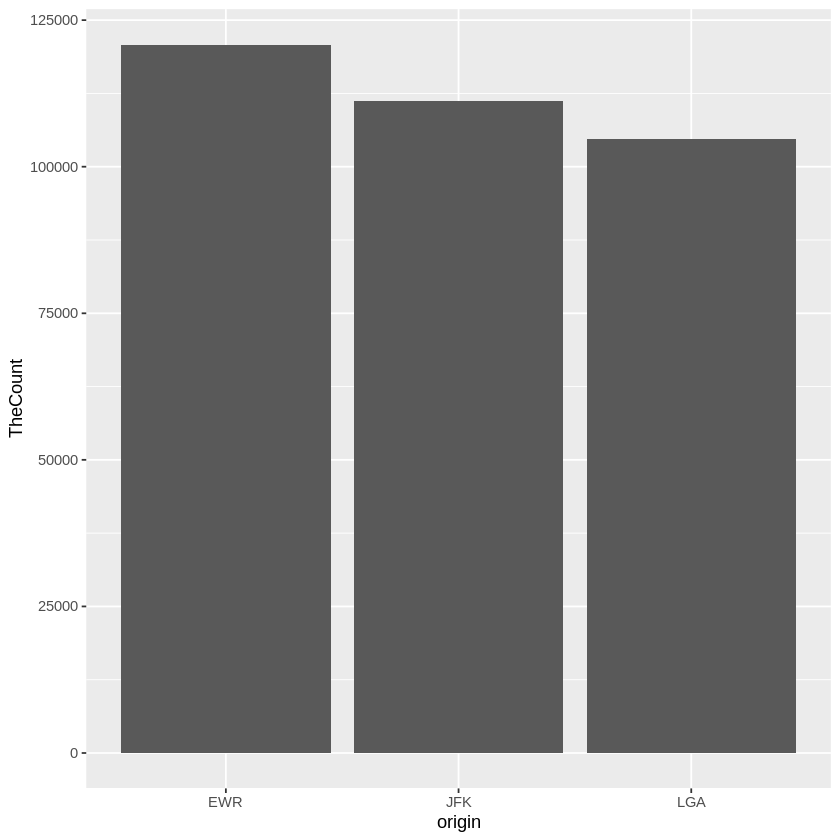

In [27]:
ggplot(data = flights,
       mapping = aes(x = origin)) +
  geom_bar()

  ggplot(
  data = flights %>%  group_by(origin) %>% summarise(TheCount = n()),
  mapping = aes(x = origin, y = TheCount)
) +
  geom_col()

ggplot(
  data = flights %>%  group_by(origin) %>% summarise(TheCount = n()),
  mapping = aes(x = origin, y = TheCount)
) +
  geom_bar(stat = "identity") 


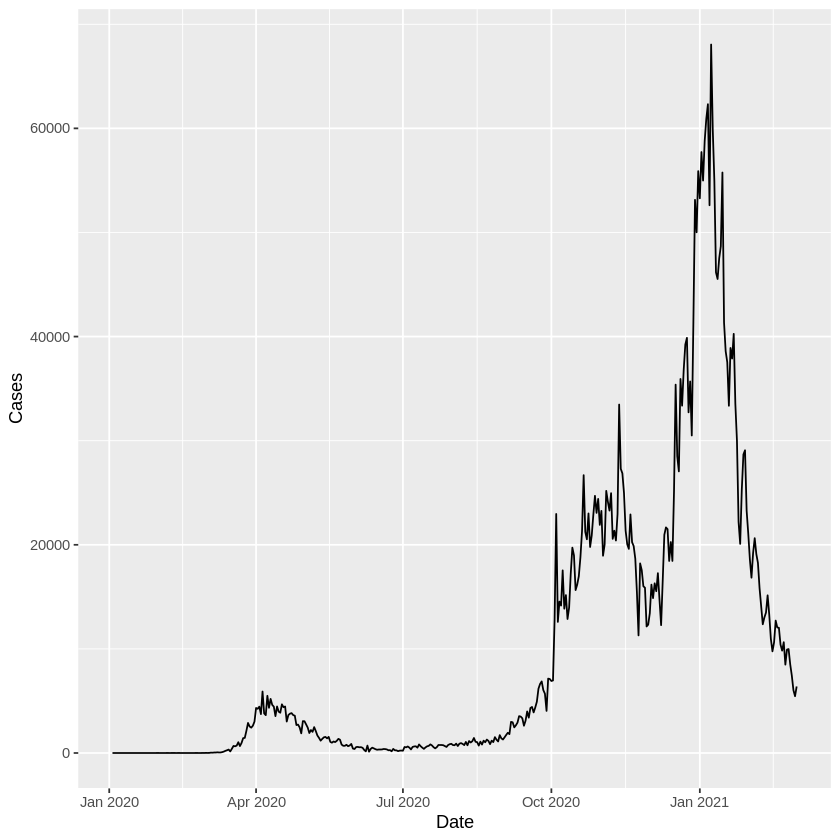

In [28]:
ggplot(
  data = covid %>%
    group_by(Date) %>%
    summarise(Cases = sum(DailyCases)),
  mapping = aes(x = Date, y = Cases)
) +
  geom_line() 

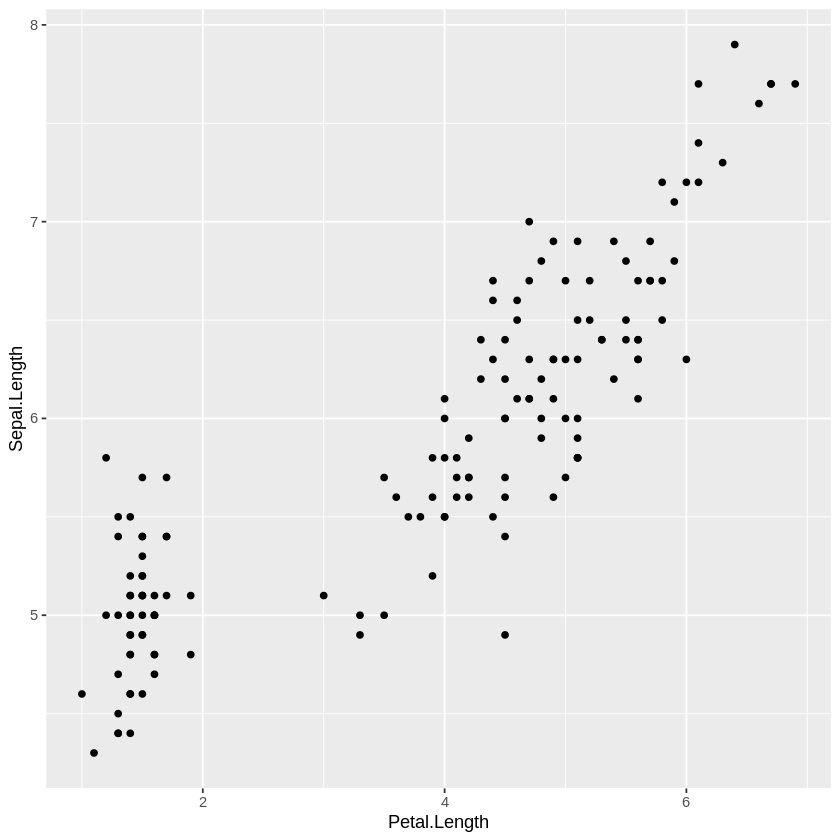

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



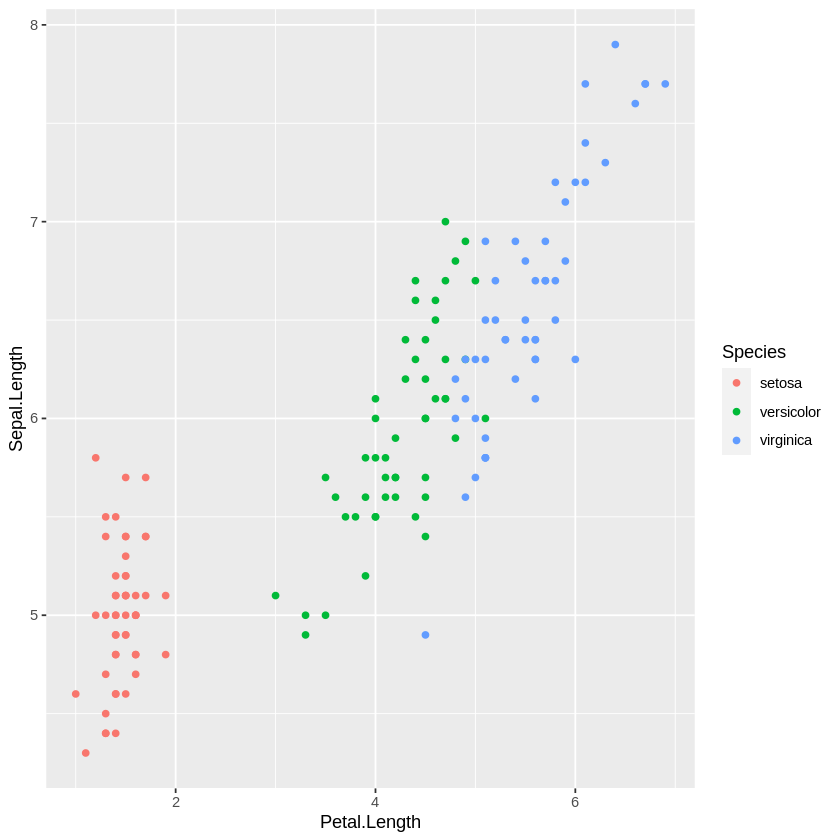

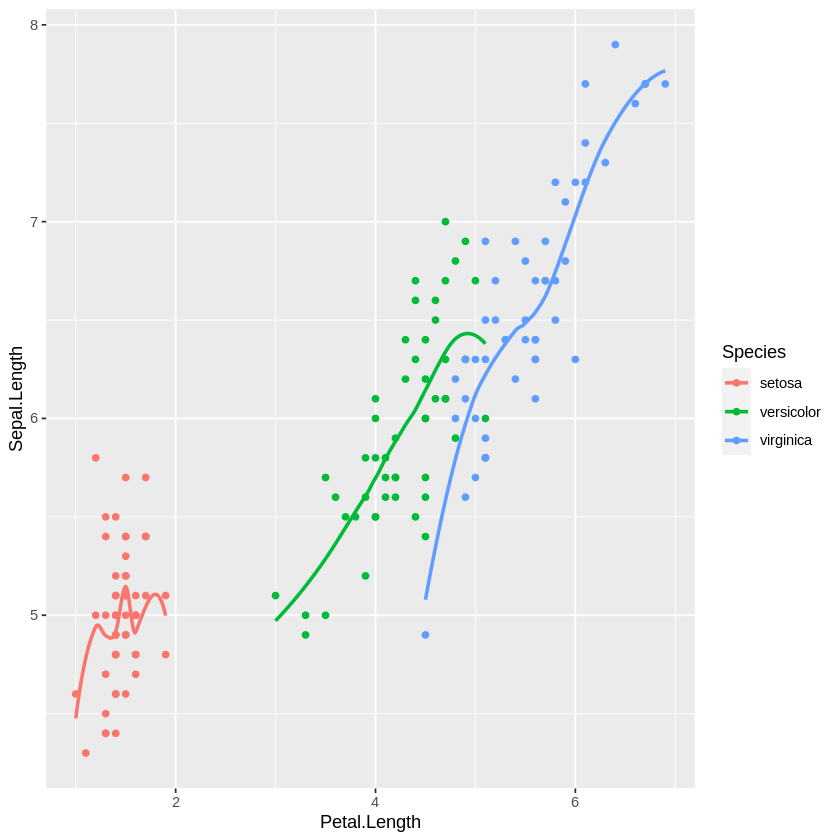

In [30]:
ggplot(data = iris,
       mapping = aes(x = Petal.Length, y = Sepal.Length)) +
  geom_point()

  ggplot(data = iris,
       mapping = aes(x = Petal.Length, y = Sepal.Length, col = Species)) +
  geom_point()

ggplot(data = iris,
       mapping = aes(x = Petal.Length, y = Sepal.Length, col = Species)) +
  geom_point() +
  geom_smooth(se = FALSE)

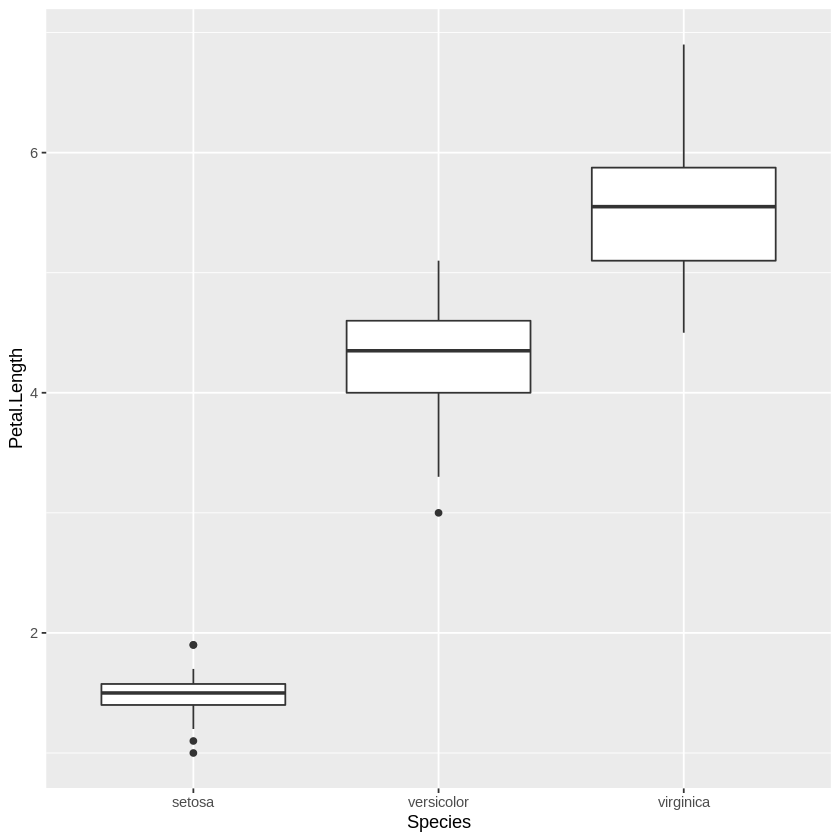

In [31]:
ggplot(data = iris,
       mapping = aes(x = Species, y = Petal.Length)) +
  geom_boxplot()

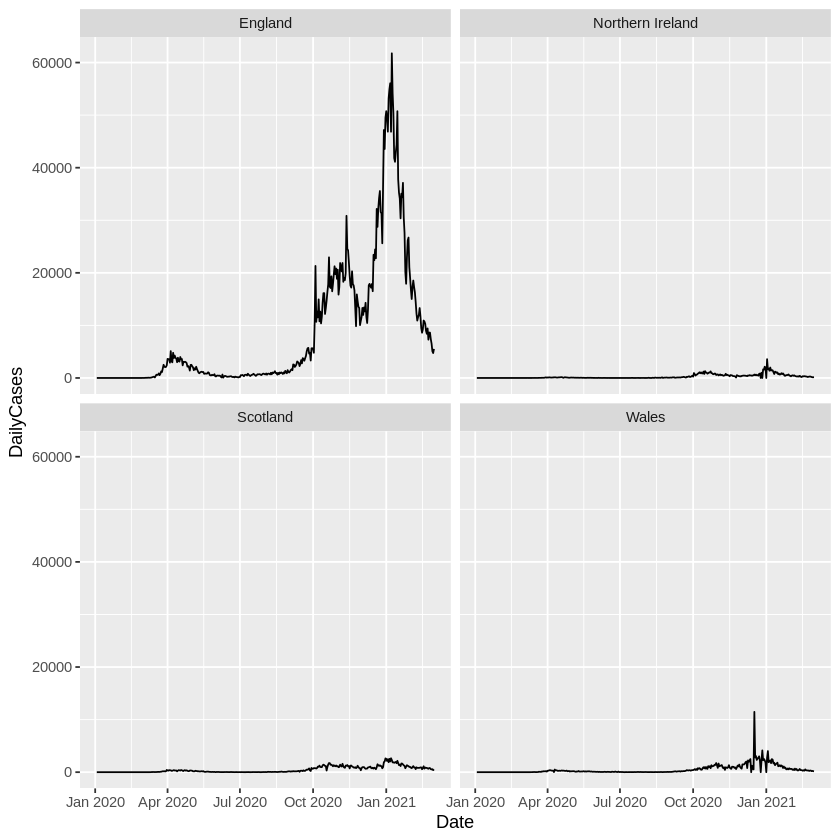

In [32]:
ggplot(data = covid,
       mapping = aes(x = Date, y = DailyCases)) +
  geom_line() +
  facet_wrap( ~ Country)

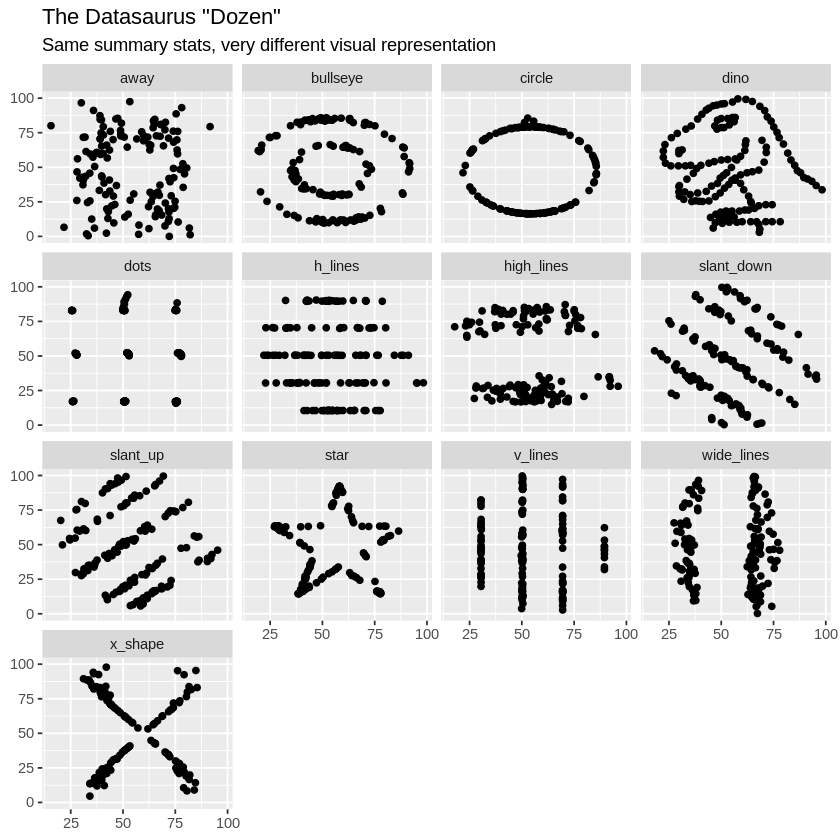

In [33]:
ggplot(data = datasaurus_dozen,
       mapping = aes(x = x, y = y)) +
  geom_point() +
  facet_wrap( ~ dataset) +
  xlab(NULL) +
  ylab(NULL) +
  ggtitle('The Datasaurus "Dozen"',
          "Same summary stats, very different visual representation")


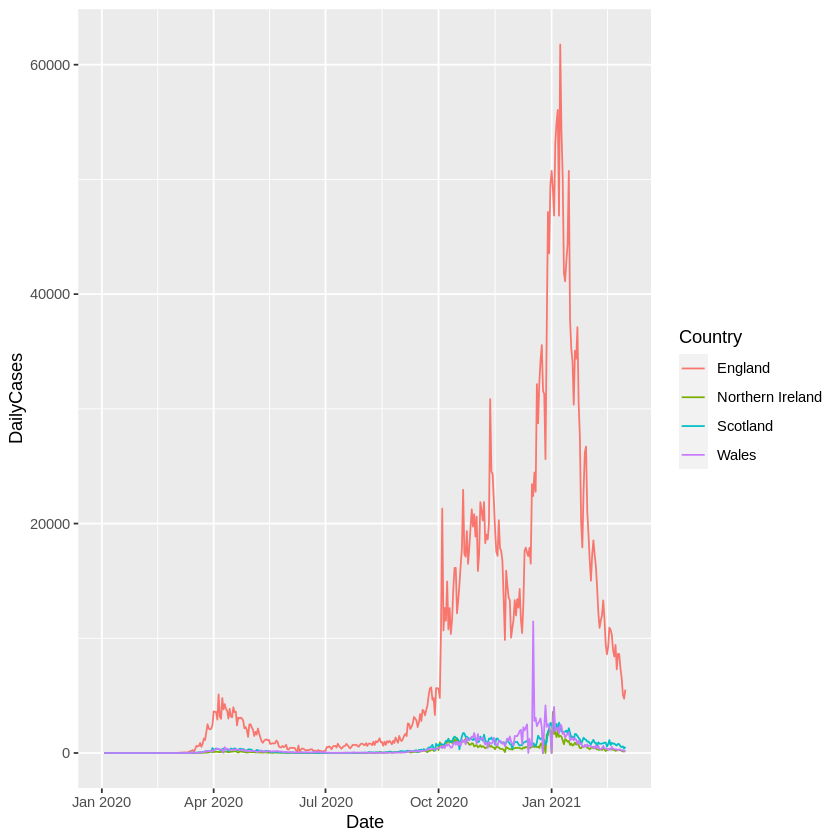

In [34]:
covid_line_plot <-
  ggplot(data = covid,
         mapping = aes(x = Date, y = DailyCases, col = Country)) +
  geom_line()

covid_line_plot

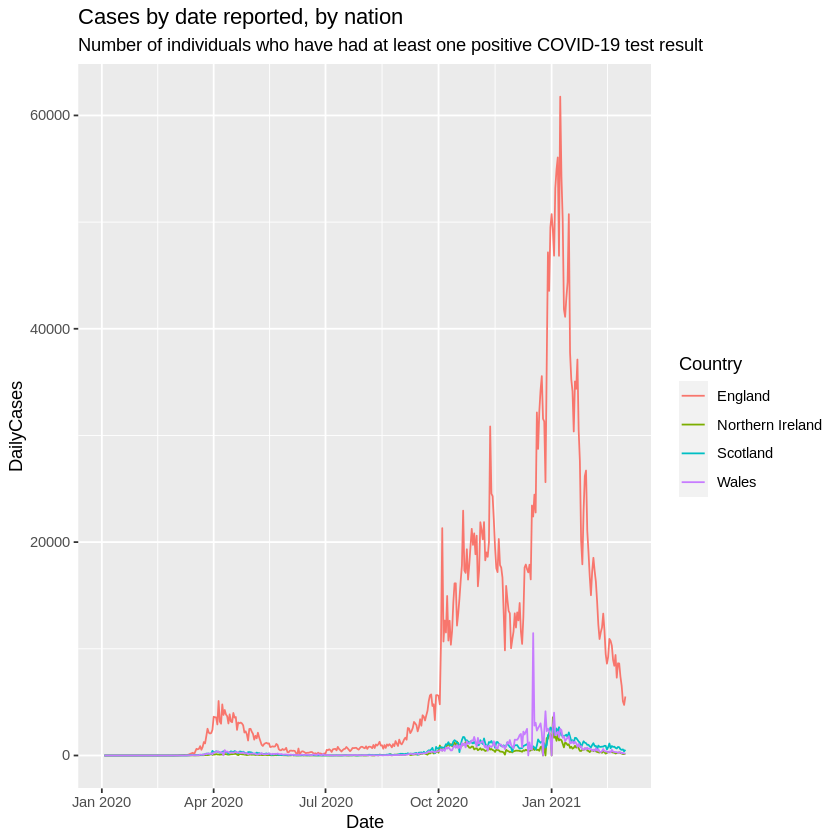

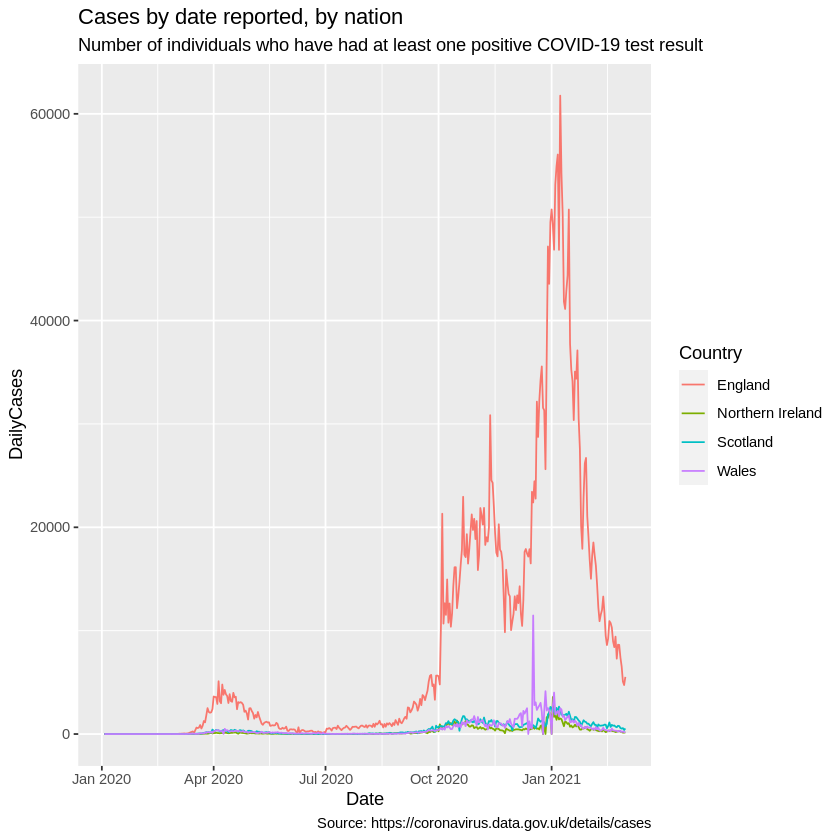

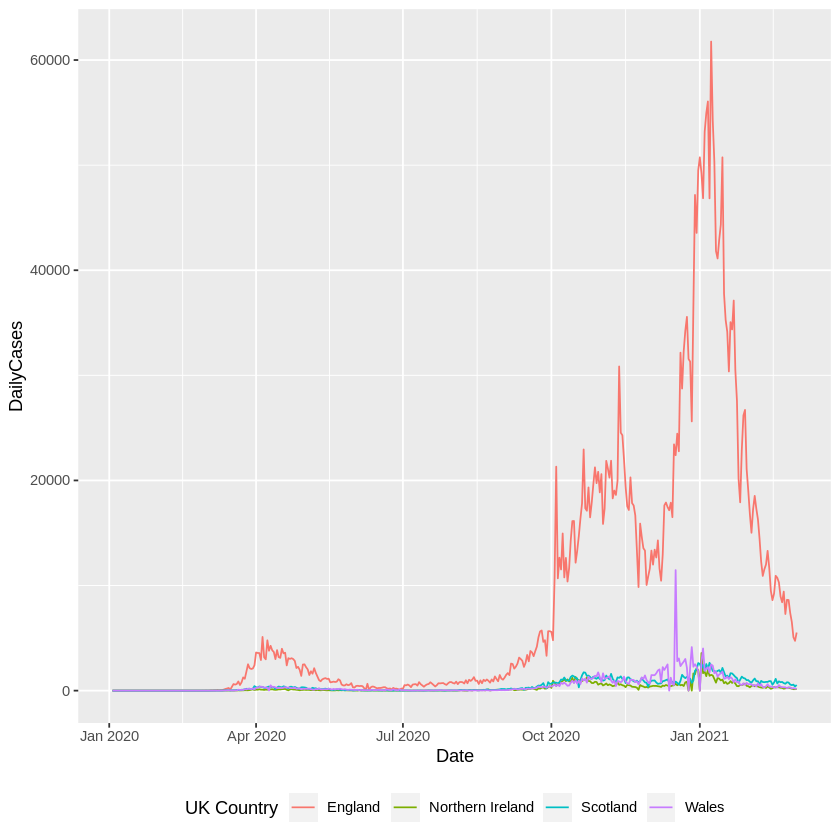

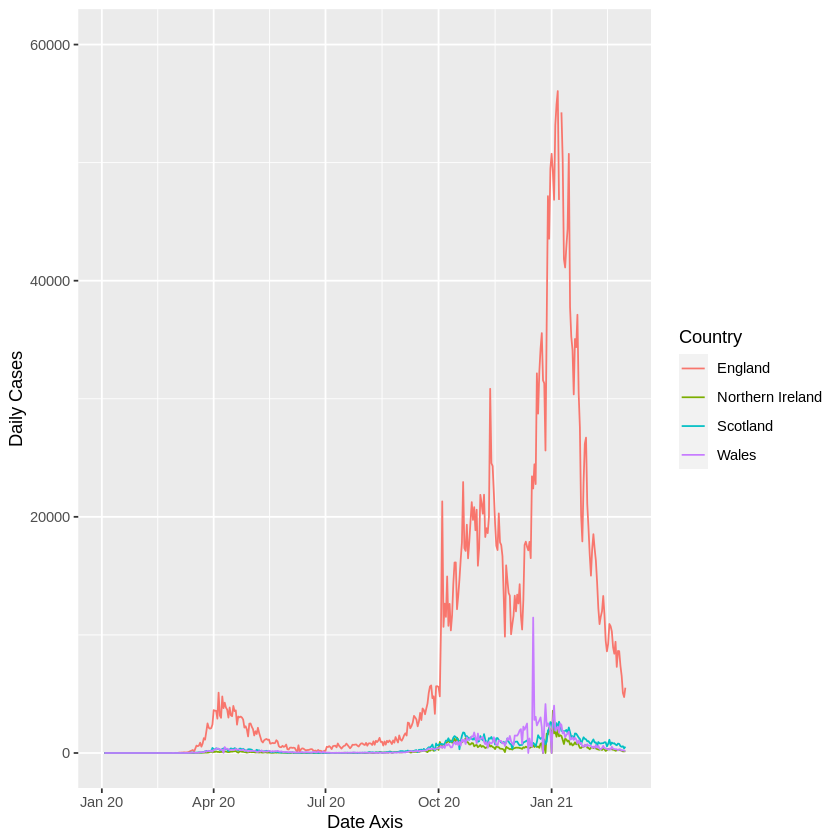

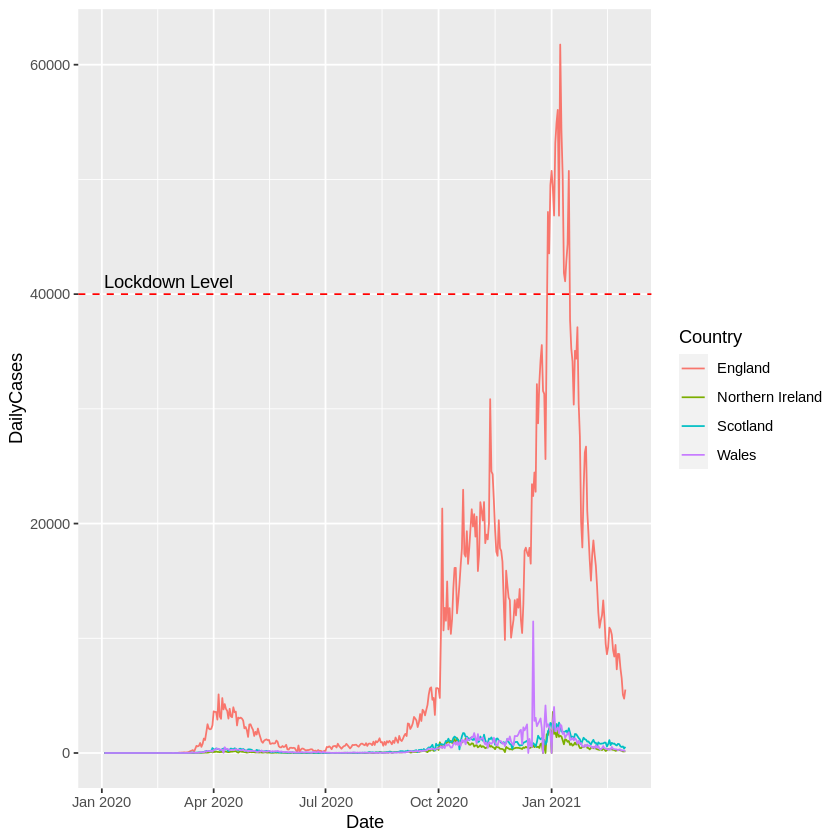

In [36]:
covid_line_plot +
  ggtitle(
    "Cases by date reported, by nation",
    "Number of individuals who have had at least one positive COVID-19 test result"
  )

covid_line_plot +
  labs(title = "Cases by date reported, by nation",
       subtitle  = "Number of individuals who have had at least one positive COVID-19 test result",
       caption =  "Source: https://coronavirus.data.gov.uk/details/cases")

covid_line_plot +
  theme(legend.position = "bottom") +
  scale_color_discrete (guide = guide_legend(title = "UK Country"))

covid_line_plot +
  scale_x_date ("Date Axis", date_labels = "%b %y") +
  scale_y_continuous("Daily Cases", limits = c(0, 60000))

covid_line_plot +
  geom_hline(yintercept = 40000,
             col = "red",
             linetype = "dashed") +
  annotate(
    "text",
    x = min(covid$Date),
    y = 40000,
    label = "Lockdown Level",
    vjust = -0.5,
    hjust = 0
  )


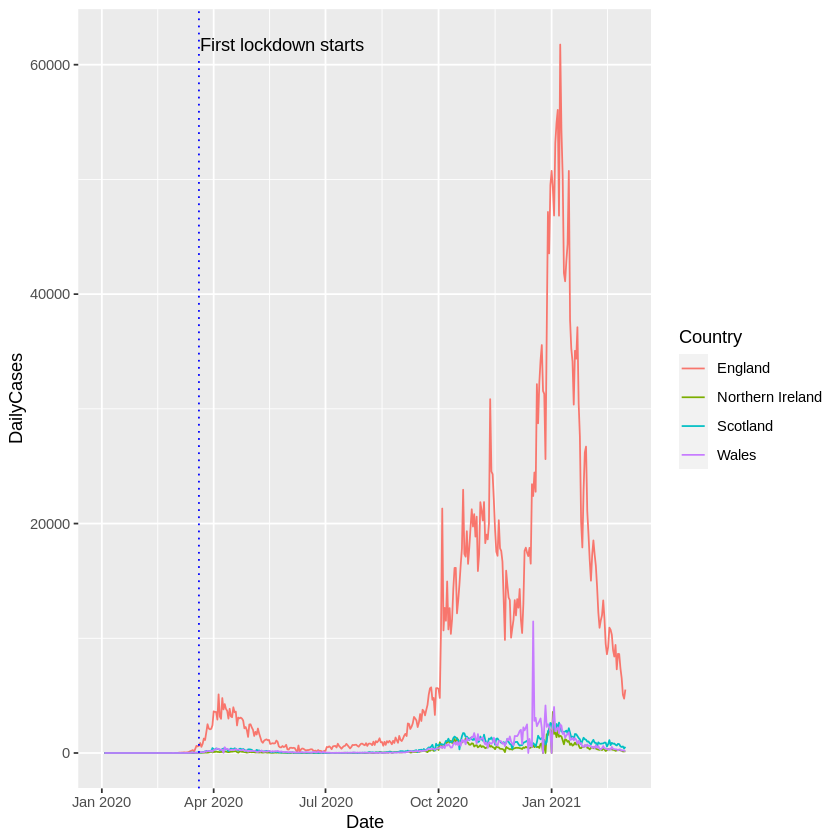

In [37]:
covid_line_plot +
  geom_vline(
    xintercept = as.Date('2020-03-20'),
    col = "blue",
    linetype = "dotted"
  ) +
  annotate(
    "text",
    x = as.Date('2020-03-20'),
    y = max(covid$DailyCases),
    label = "First lockdown starts",
    vjust = 0.5,
    hjust = -0.005
  )



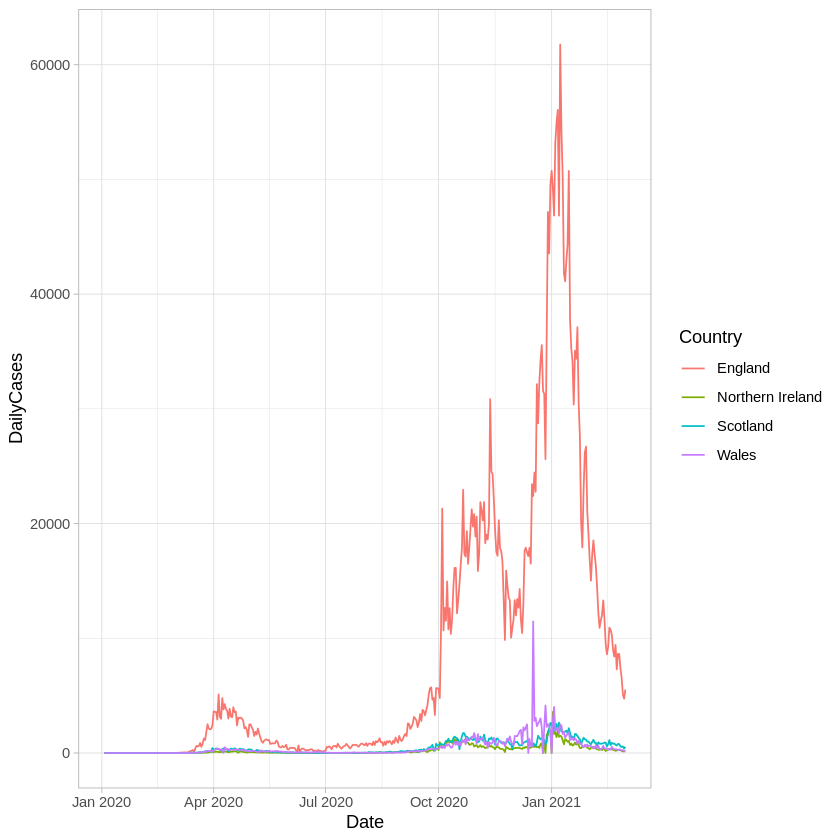

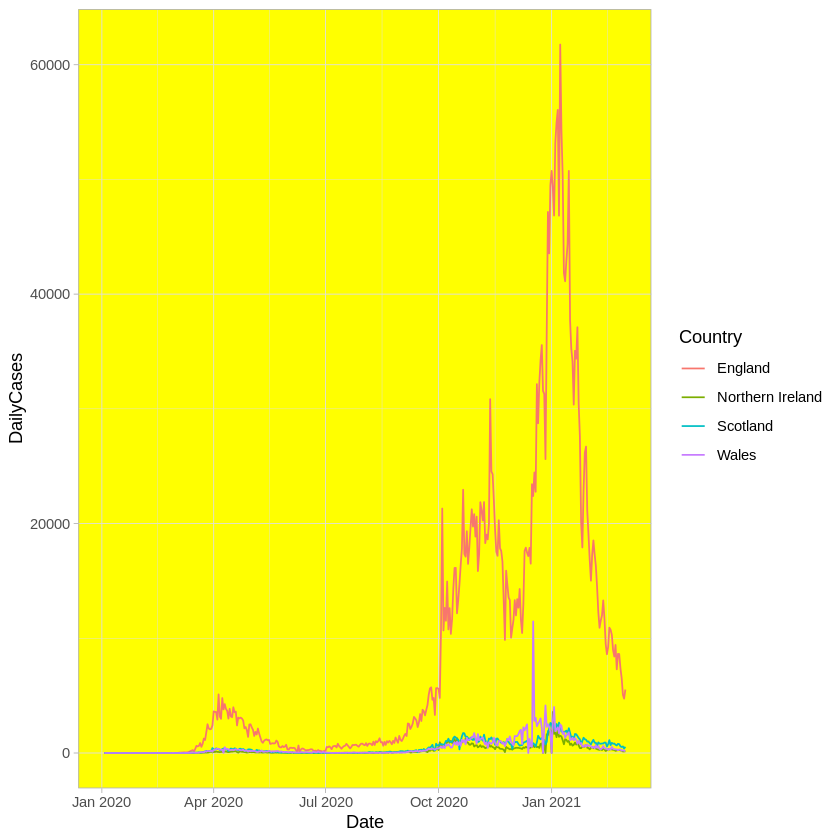

In [40]:
covid_line_plot +
  theme_light()

  covid_line_plot +
  theme_light() +
  theme(panel.background = element_rect(fill="yellow")) 


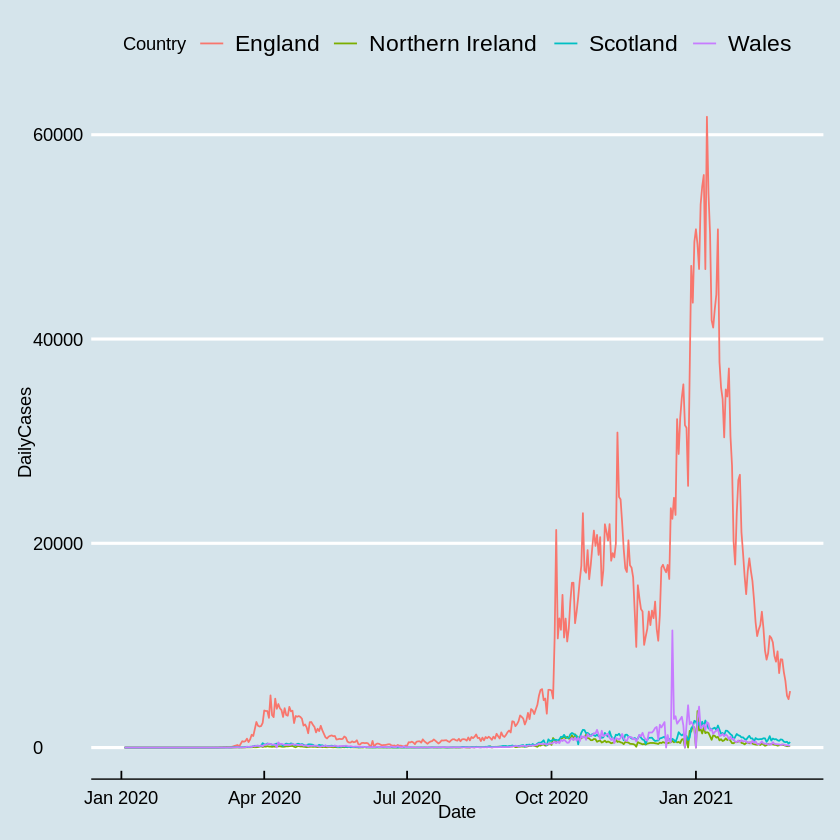

In [45]:
library(ggthemes)
covid_line_plot +
  theme_economist()


In [48]:
covid_start_end <-
  covid %>%
  filter(Date == '2021-01-02'  | Date == '2021-03-02') %>%
  mutate(Marker  = ifelse(Date == '2021-01-02', 'Start', 'End')) %>%
  select(Country, Marker, DailyCases) %>%
  spread(Marker, DailyCases)

covid_start_end

Country,End,Start
<chr>,<dbl>,<dbl>
England,5530,49248
Northern Ireland,149,3576
Scotland,542,2137
Wales,170,2764


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



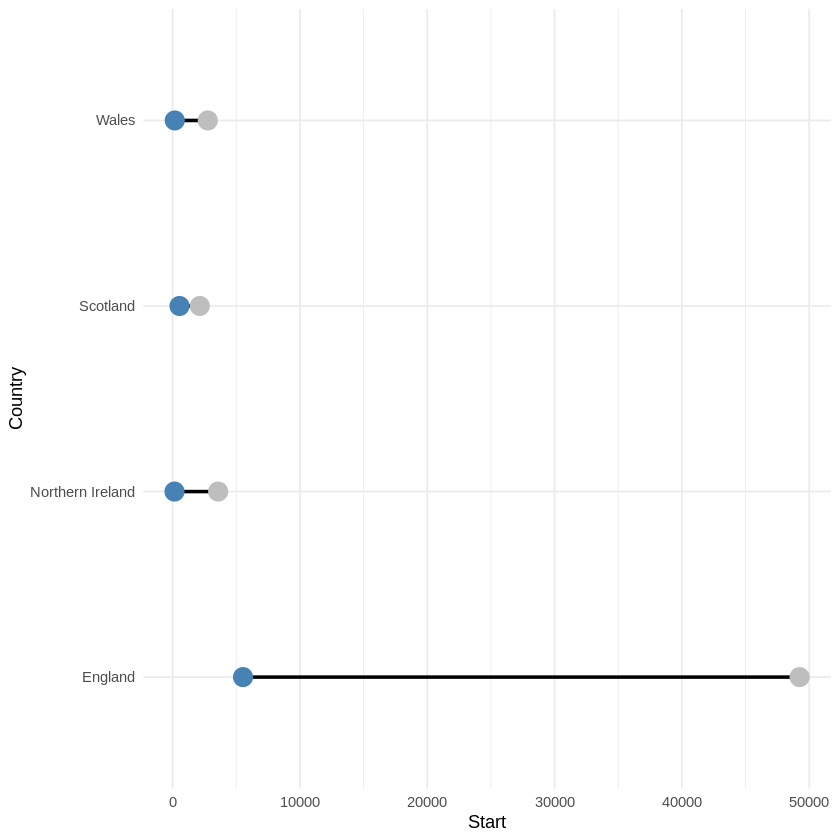

In [52]:
library(ggalt)

ggplot(data = covid_start_end,
       mapping = aes(x = Start, xend = End, y = Country)) +
  theme_minimal() +
  geom_dumbbell(
    colour_x = "grey",
    colour_xend = "steelblue",
    size = 1,
    size_x = 5,
    size_xend = 5
  )

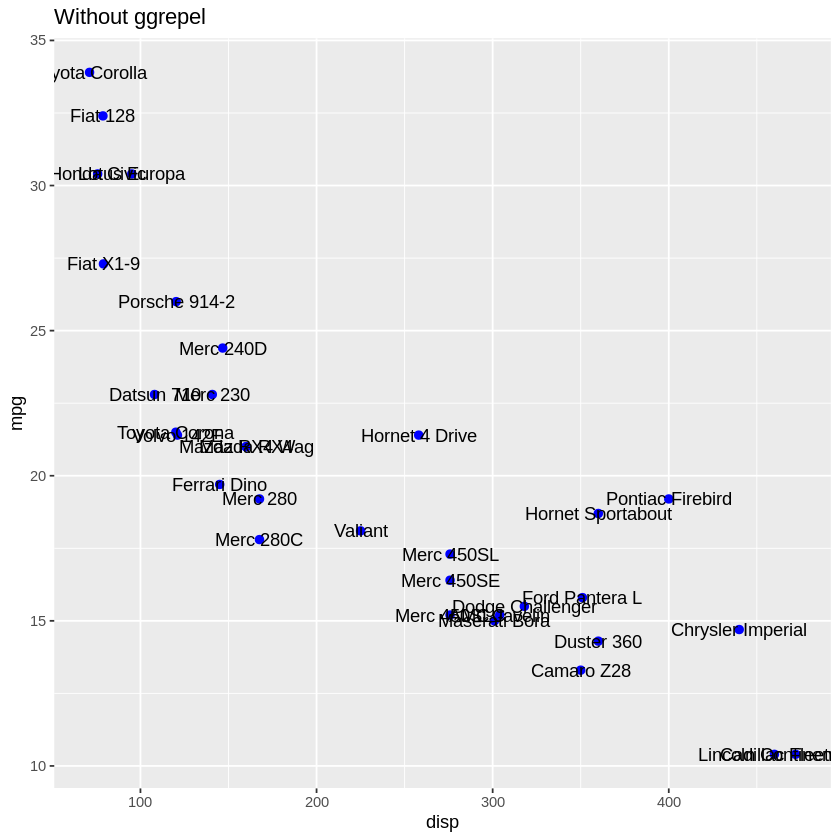

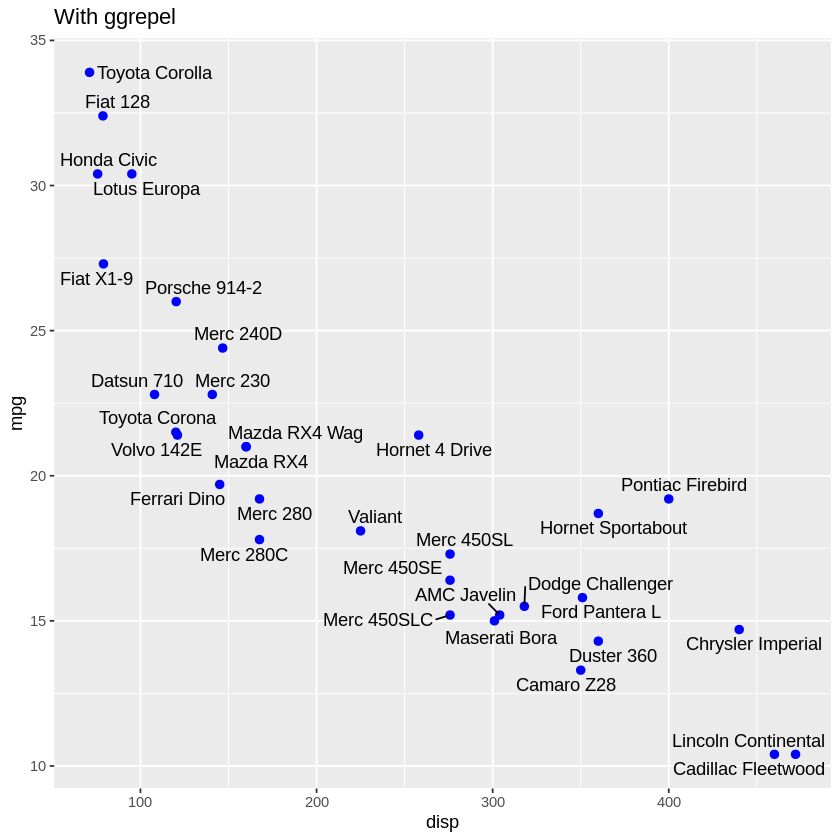

In [53]:
# Before
ggplot(data = mtcars,
       mapping = aes(x = disp, y = mpg)) +
  geom_point(colour = "blue", size = 2) +
  geom_text(label = rownames(mtcars)) +
  ggtitle("Without ggrepel")


library(ggrepel)
# After
ggplot(data = mtcars,
       mapping = aes(x = disp, y = mpg)) +
  geom_point(colour = "blue", size = 2) +
  geom_text_repel(label = rownames(mtcars)) +
  ggtitle("With ggrepel")

In [ ]:
library(gganimate)
ggplot(
  data = filter(covid, Date > as.Date("2021-02-01")),
  mapping = aes(x = Date, y = DailyCases, col = Country)
) +
  geom_line() +
  theme_classic() +
  transition_reveal(along = Date)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


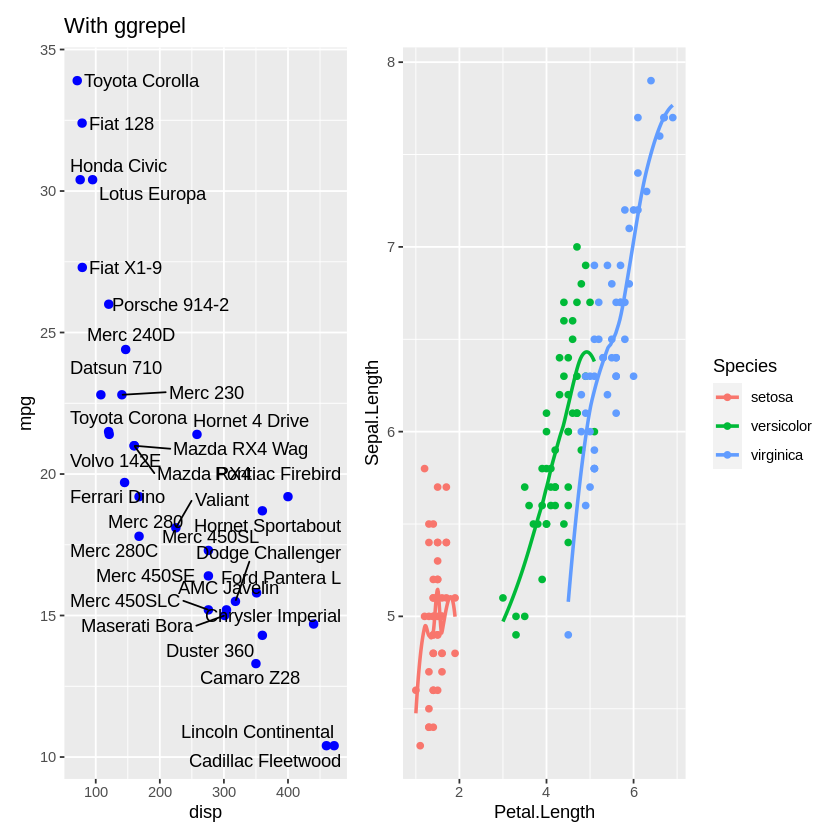

In [55]:
library(patchwork)

cars_plot <-
  ggplot(data = mtcars,
         mapping = aes(x = disp, y = mpg)) +
  geom_point(colour = "blue", size = 2) +
  geom_text_repel(label = rownames(mtcars)) +
  ggtitle("With ggrepel")

iris_plot <-
  ggplot(data = iris,
         mapping = aes(x = Petal.Length, y = Sepal.Length, col = Species)) +
  geom_point() +
  geom_smooth(se = FALSE)

cars_plot + iris_plot


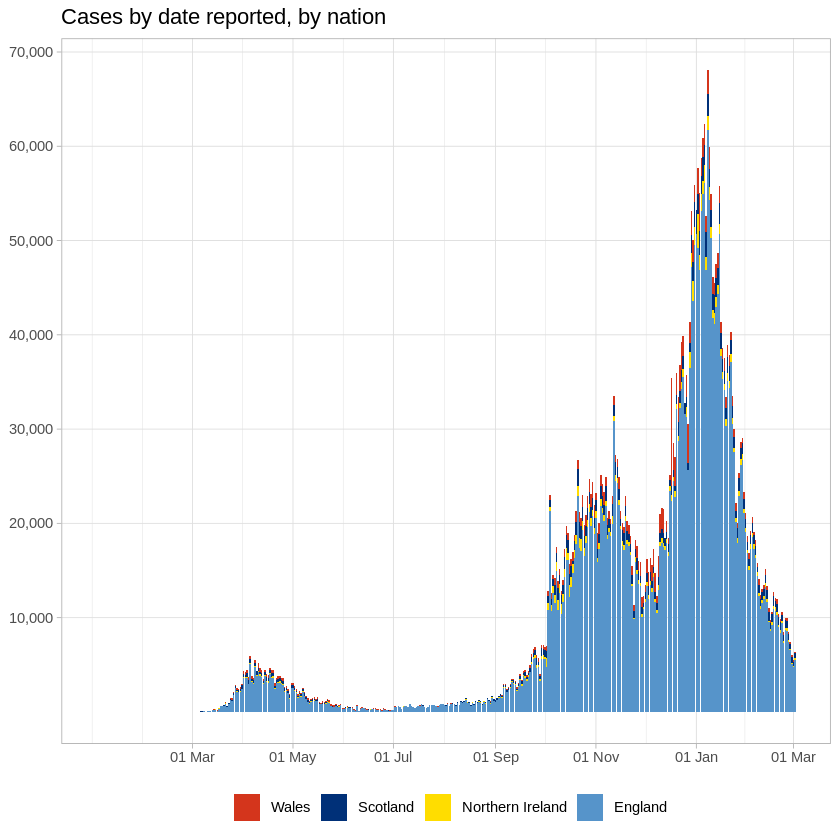

In [57]:
# Example Answer

country_colours <-
  c(
    England = "#5694ca",
    Scotland = "#003078",
    Wales = "#d4351c",
    `Northern Ireland` = "#ffdd00"
  )

ggplot(data = covid,
       mapping = aes(
         x = Date,
         y = DailyCases,
         fill = fct_rev(Country)
       )) +
  geom_col() +
  scale_fill_manual(values = country_colours, guide = guide_legend(title = NULL)) +
  theme_light() +
  ggtitle("Cases by date reported, by nation") +
  theme(legend.position = "bottom")  +
  scale_y_continuous(
    name = NULL,
    breaks = seq(10000, 70000, 10000),
    minor_breaks = NULL,
    labels = comma
  ) +
  scale_x_date(
    name = NULL,
    breaks = seq(as.Date("2020-03-01"), as.Date("2021-03-01"), by = "2 month"),
    date_labels = "%d %b"
  )
